In [294]:
import numpy as np
import pandas as pd

In [295]:
orig_df=pd.read_csv("Churn_Modelling.csv")
orig_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Removing unwanted columns "RowNumber","CustomerId","Surname".

In [296]:
df=orig_df.drop(columns=["RowNumber","CustomerId","Surname"])

In [297]:
print("Lets get some data info: ")
print(df.info())

Lets get some data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


As here we have 2 categorical columns as "Geography","Gender".

Also remaining 9 numerical columns. So in total 11 columns

In [298]:
print("Some statistical observation from data: ")
df.describe()

Some statistical observation from data: 


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Checking for missing values in data

In [299]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values present in data

# EDA

Checking for distributions for variables

Let's go for numerical columns first.

In [300]:
df_num_col=[]
for i in df.columns:
    if (df[i].dtype=="int64") | (df[i].dtype=="float64"):
        df_num_col.append(i)

df_num_col


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [301]:
df_cat_col=df.columns.drop(df_num_col)
df_cat_col

Index(['Geography', 'Gender'], dtype='object')

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's observe ditributions of different variables.

Removing binary variables as there count plot will be plot latter

In [303]:
df_bin_col=["HasCrCard","IsActiveMember","Exited"]
df_num_col=[items for items in df_num_col if items not in df_bin_col]
df_num_col
df_bin_col.remove("Exited")
df_cat_col=list(df_cat_col)+df_bin_col


In [304]:
df_bin_col

['HasCrCard', 'IsActiveMember']

# Distributions for numerical columns

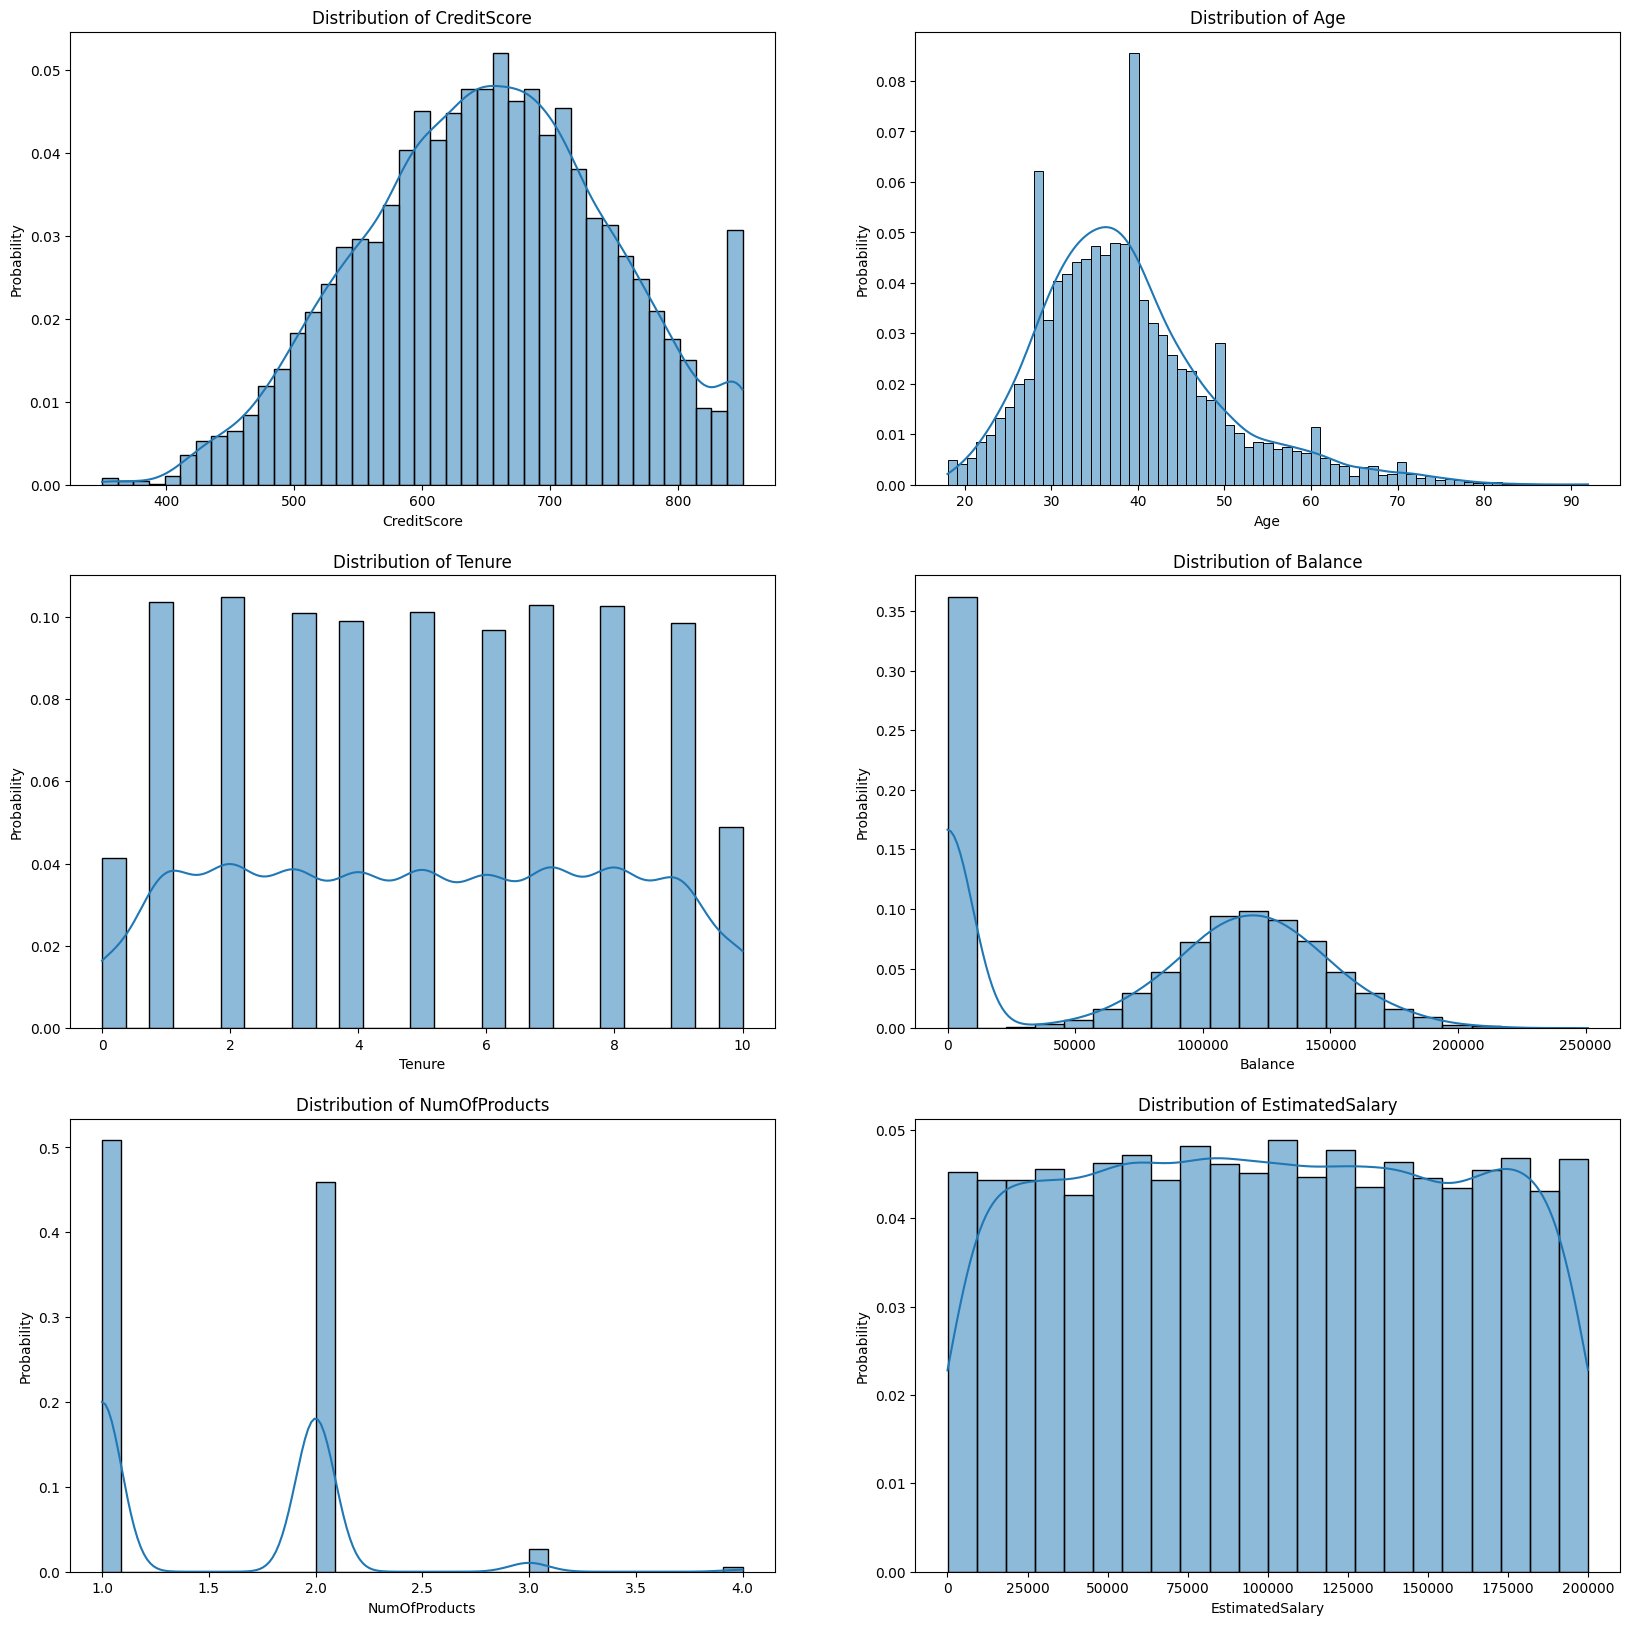

In [305]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.ravel()
for i,col in enumerate(df_num_col):
    sns.histplot(df[col],ax=ax[i],stat="probability",kde=True)
    ax[i].set_title(f"Distribution of {col}")
    



Obervarions:

1. CreditScore: Distribution of Credit Score is mostly normal slight left skewed implies maximum customers have credit score between 600 - 700.

2. Age        : Distibution of age is little right skewed implying mostly customers from young age and less customer are from older group.

3. Tenure     : Distribution of Tenure seems to be uniform kind implying number of customers been in bank is almost same for years 1-10.

4. Balance    : Distribution of balance is noraml but its seems bimodal normal as it has a peak at 0 also, this peak may suggest inactive users.

5. NumOfProducts: As from distribution of NumProducts, it seems that most of the peoples have onr=e or two products while very less have 3 or 4 products.

6. EstimatedSalary: Its distribution is also indicating uniform like behavior implies salaries are evenly spread across all income levels.

After obseving this it seems like NumOfProduct should consider like categorical variable.

In [306]:
df_cat_col.append("NumOfProducts")
df_num_col.remove("NumOfProducts")

# Correlation between numerical variables

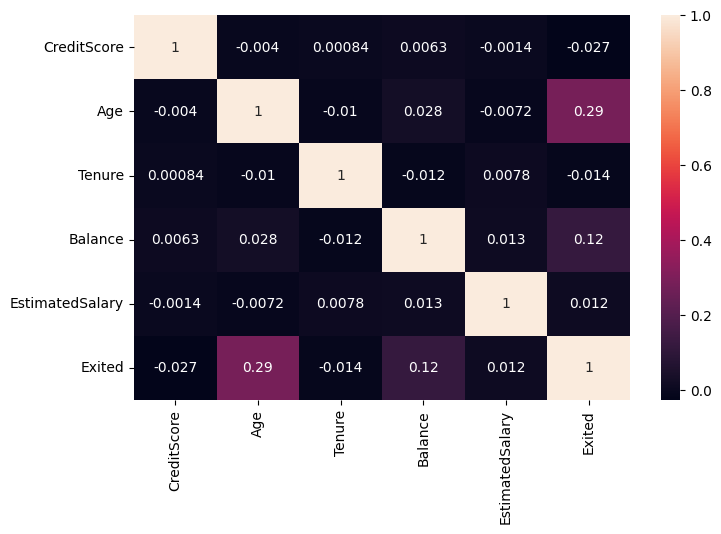

In [307]:
plt.figure(figsize=(8,5))
sns.heatmap(data=df[df_num_col+["Exited"]].corr(),annot=True)
plt.show()

Observation based on heatmap:

1. Age and Exited are positively correlated with corr. coeficient 0.29 implies older customer are more likely to churn.

2. Not much affectable correlation in between the variables.

# Count plots for categorical variables:

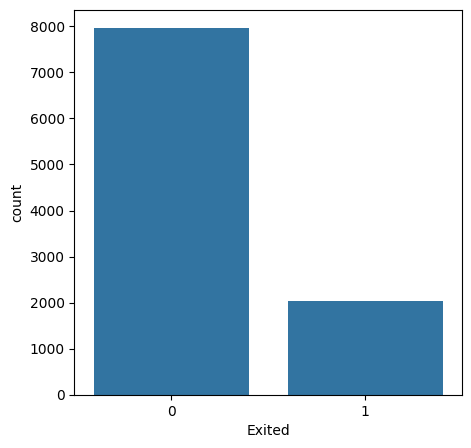

In [308]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x=df["Exited"])
plt.show()


So, around 8000 customers churned out off 10000

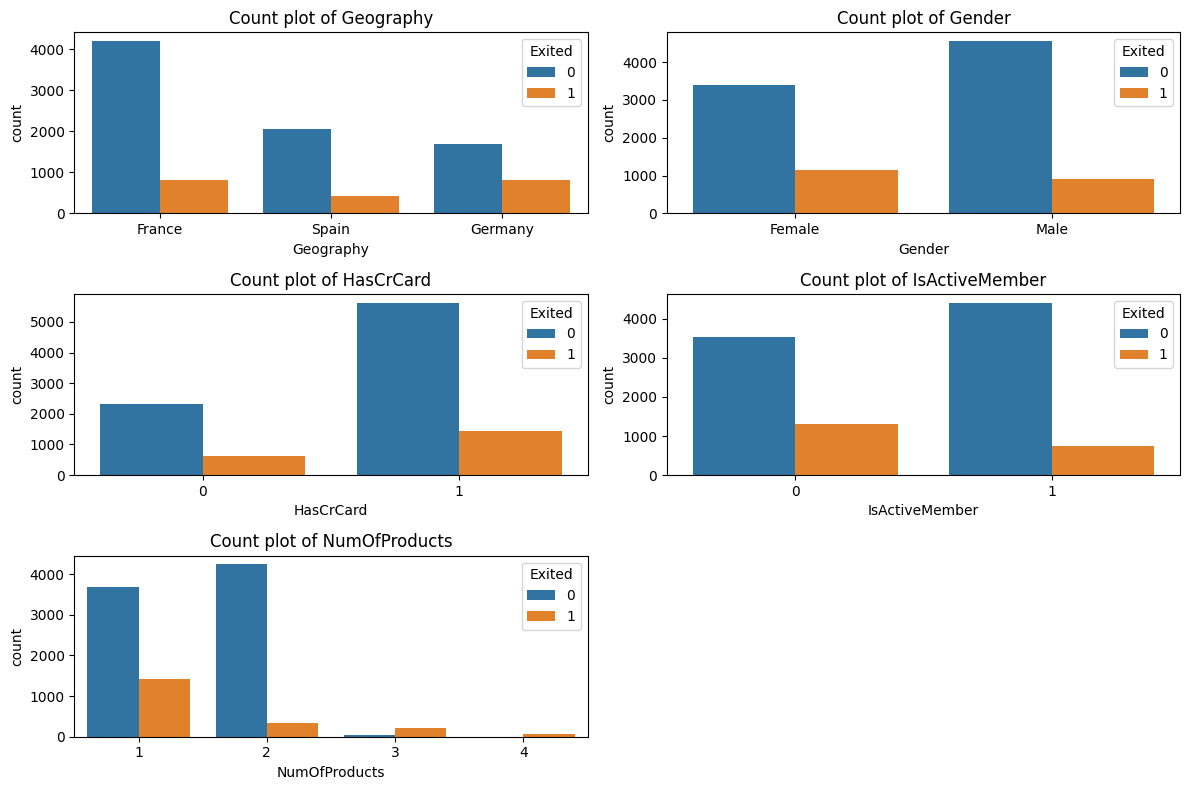

In [309]:
fig,ax= plt.subplots(3,2,figsize=(12 ,8))
ax=ax.flatten()
for i, col in enumerate(df_cat_col):
    sns.countplot(data=df,x=col,ax=ax[i],hue="Exited",)
    ax[i].set_title(f"Count plot of {col}")
ax[5].set_visible(False)
plt.tight_layout()
plt.show()
    

In [310]:
prop_by_geo=df["Exited"].groupby(df["Geography"]).agg(["count","sum"])
print("1. Percentage of churn  by : ",prop_by_geo["sum"]*100/prop_by_geo["count"])
prop_by_gen=df["Exited"].groupby(df["Gender"]).agg(["count","sum"])
print("2. Percentage of churn by : ",prop_by_gen["sum"]*100/prop_by_gen["count"])
prop_by_crd=df["Exited"].groupby(df["HasCrCard"]).agg(["count","sum"])
print("3. Percentage of churn by :",prop_by_crd["sum"]*100/prop_by_crd["count"])
prop_by_activ=df["Exited"].groupby(df["IsActiveMember"]).agg(["count","sum"])
print("4. Percentage of churn by :",prop_by_activ["sum"]*100/prop_by_activ["count"])
prop_by_numProd=df["Exited"].groupby(df["NumOfProducts"]).agg(["count","sum"])
print("5. Percentage of churn by :",prop_by_numProd["sum"]*100/prop_by_numProd["count"])


1. Percentage of churn  by :  Geography
France     16.154767
Germany    32.443204
Spain      16.673395
dtype: float64
2. Percentage of churn by :  Gender
Female    25.071539
Male      16.455928
dtype: float64
3. Percentage of churn by : HasCrCard
0    20.814941
1    20.184266
dtype: float64
4. Percentage of churn by : IsActiveMember
0    26.850897
1    14.269074
dtype: float64
5. Percentage of churn by : NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
dtype: float64


Obsevations based on countplots:

1. Geography: Germany(32.44%) has higher churn rate than France(16.15%) and Spain(16.67%).

2. Gender: Males have higher lower churn rate (16.45) than that of females(25.07).

3. Credit Card: Customers with credit card have little lower churn rate(20.81) as compared to  that of without card (20.81).

4. Active Member: Inactive members are more likely to churn with churn rate 26.85 than active members(14.26).

5. NumOfProducts: Customers having 2 products has least churn rate(7.58), while with 4 products are almost all churned(100%).

# Outlier detection

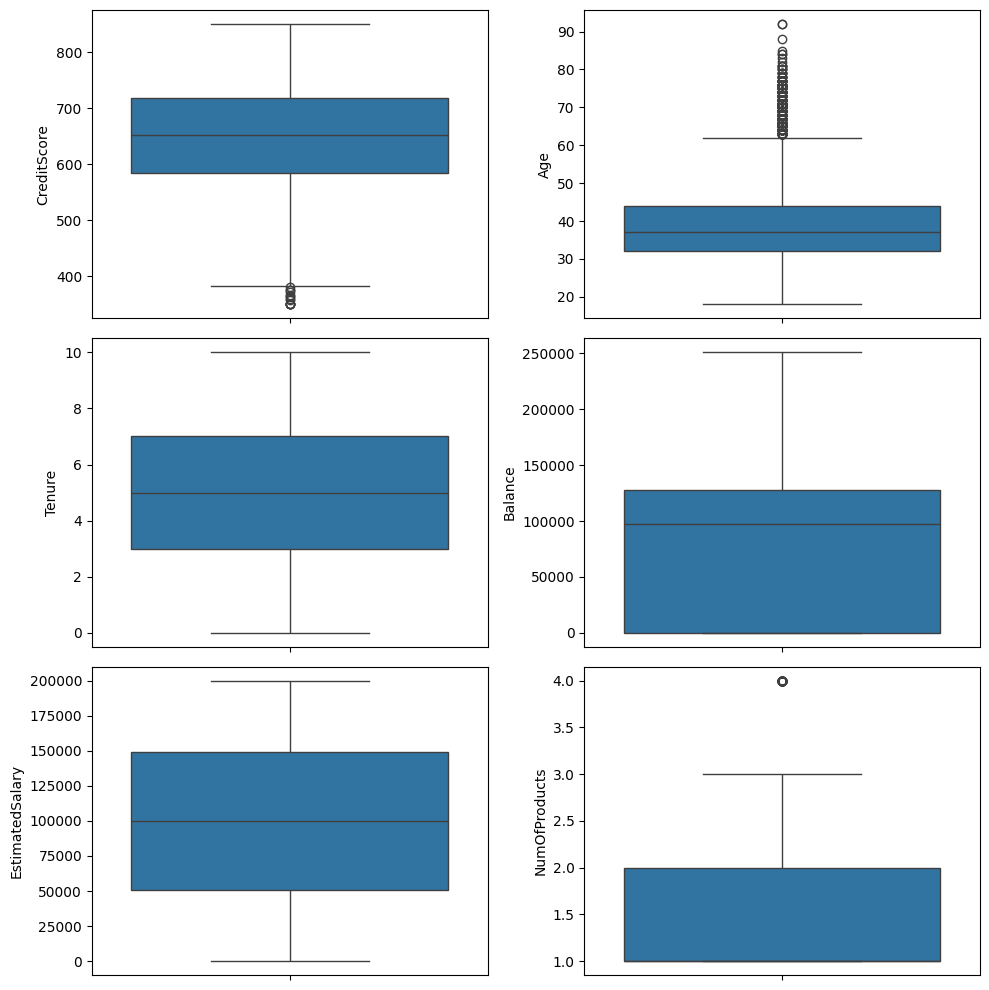

In [311]:
fig,ax=plt.subplots(3,2,figsize=(10,10))
ax=ax.ravel()
for i,col in enumerate(df_num_col+["NumOfProducts"]):
    sns.boxplot(df[col],ax=ax[i])
plt.tight_layout()

As here we can see CreditScore have some outliers and Age have very much outliers.

But as this both columns observations are important to us also outliers are not much extreme so what we do is we use Roboust scaling for reducing the influence of this outliers.

# Train test spliting

For testing the performance of our model we need to split our data into two parts, say 80% of data will be used for training the model and remaining 20% will be used for testing the performance of model.

In [312]:
x=df.drop(columns=["Exited"])
y=df["Exited"]


In [313]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Data Preprocessing

Our data looks like,

In [314]:

x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8856,774,France,Female,26,5,0.00,2,1,1,64716.08
1545,602,Germany,Female,42,6,158414.85,1,1,1,131886.46
8136,716,France,Female,38,1,0.00,2,1,1,99661.46
7768,601,Spain,Female,20,9,122446.61,2,1,0,86791.90
7782,585,France,Male,54,8,87105.32,1,1,1,55346.14


We don't have missing values.

In [315]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [316]:
rob_scale=RobustScaler()
std_scale=StandardScaler()
ohe_encoder=OneHotEncoder(drop="first")

In [317]:
from sklearn.compose import ColumnTransformer

In [318]:
col_trf=ColumnTransformer([
   
    ("rob_scale",rob_scale,["CreditScore","Age"]),
    ("std_scale",std_scale,["Balance","EstimatedSalary"]),
    ("ohe",ohe_encoder,["Geography","Gender","NumOfProducts"])
    
    
],remainder="passthrough")

In [319]:
x_train_trf=col_trf.fit_transform(x_train)
x_test_trf=col_trf.transform(x_test)

In [320]:
col_trf.get_feature_names_out()

array(['rob_scale__CreditScore', 'rob_scale__Age', 'std_scale__Balance',
       'std_scale__EstimatedSalary', 'ohe__Geography_Germany',
       'ohe__Geography_Spain', 'ohe__Gender_Male', 'ohe__NumOfProducts_2',
       'ohe__NumOfProducts_3', 'ohe__NumOfProducts_4',
       'remainder__Tenure', 'remainder__HasCrCard',
       'remainder__IsActiveMember'], dtype=object)

# Multicollinearity
Let's now check if there is any multicollinearity.

In [321]:
x1=pd.DataFrame(x_train_trf)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
print(vif_data)

    feature       VIF
0         0  1.001359
1         1  1.059375
2         2  1.389983
3         3  1.001641
4         4  1.712814
5         5  1.403877
6         6  1.966332
7         7  2.052801
8         8  1.054204
9         9  1.014209
10       10  2.919019
11       11  2.631875
12       12  1.875838


As, all VIF values are less than 5 hence no multicollinearity.

# Model Selection

For selecting a appropriate model, lets start from simple model and find which is is performing better and then we will go for upgrading that model by hypertuning the parameters.

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [323]:
lor=LogisticRegression(class_weight="balanced")
dt=DecisionTreeClassifier(class_weight="balanced",max_depth=50)
rfc=RandomForestClassifier(class_weight="balanced")
rfcb=BalancedRandomForestClassifier()
abc=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight="balanced",max_depth=1))
gbc=GradientBoostingClassifier()



In [ ]:
lor.fit(x_train_trf,y_train)
dt.fit(x_train_trf,y_train)
rfc.fit(x_train_trf,y_train)
rfcb.fit(x_train_trf,y_train)
abc.fit(x_train_trf,y_train)
gbc.fit(x_train_trf,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [ ]:
print(" Classification Report by Logistic Regression: \n",classification_report(y_test,lor.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,lor.predict_proba(x_test_trf)[:,1]))
print(" Classification Report by Decision Tree: \n",classification_report(y_test,dt.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,dt.predict_proba(x_test_trf)[:,1]))
print(" Classification Report by Random Forest: \n",classification_report(y_test,rfc.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,rfc.predict_proba(x_test_trf)[:,1]))
print(" Classification Report by Balanced random forest: \n",classification_report(y_test,rfcb.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,rfcb.predict_proba(x_test_trf)[:,1]))
print(" Classification Report by Adaboost Classifier: \n",classification_report(y_test,abc.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,abc.predict_proba(x_test_trf)[:,1]))
print(" Classification Report by Gradient Classifier: \n",classification_report(y_test,gbc.predict(x_test_trf)),"\n","ROC-AUC Score: ",roc_auc_score(y_test,gbc.predict_proba(x_test_trf)[:,1]))

 Classification Report by Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1617
           1       0.43      0.74      0.55       383

    accuracy                           0.77      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000
 
 ROC-AUC Score:  0.8219989633641257
 Classification Report by Decision Tree: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1617
           1       0.42      0.40      0.41       383

    accuracy                           0.78      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.78      0.78      0.78      2000
 
 ROC-AUC Score:  0.6364871607318456
 Classification Report by Random Forest: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1617
           1       0.72     

Since we are analyzing and predicting churn rate of bank customers, we are most interested in finding and stopping the customers who are likely to churn.

As, our data has imbalanced classes accuracy is not much trustable as it might be misleading. So, we need to go for precision and recall. Futher, as in our project the problem is to perdict the churning customers so, predicting not churning to customer who is likely churn(False Negative) is going to be more dangerous than predicting churning to a customer who is not going to churn(False positive). So our metrics for model performance will be recall and f1 score.

From obseving above classification reports, we find Logistic regression is overall better than others models as it has good recall value(0.74)  and f1 score(0.55) with ROC-AUC score 0.82. Also, the accuracy score is 0.77 which is not bad.

So, we will be going for modifying Logistic regression model.

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
    "penalty":["l1","l2","elasticnet"],
    "class_weight":["balanced"],
    "solver":['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "warm_start":[True,False]
}
grid=GridSearchCV(LogisticRegression(),param_grid=parameters,scoring="recall",cv=5,n_jobs=-1)

In [ ]:
grid.fit(x_train_trf,y_train)

c:\Users\kkbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kkbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kkbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kkbis\AppD

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='recall')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lor=grid.best_estimator_
print(lor)
lor.fit(x_train_trf,y_train)
print("Classification Report: \n",classification_report(y_test,lor.predict(x_test_trf)))
print("ROC-AUC Score: ",roc_auc_score(y_test,lor.predict_proba(x_test_trf)[:,1]) )
print("Cross Validation Score: ",np.mean(cross_val_score(lor,x_train_trf,y_train,cv=10,scoring="recall")))

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear',
                   warm_start=True)
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1617
           1       0.44      0.74      0.55       383

    accuracy                           0.77      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000

ROC-AUC Score:  0.822163662521738
Cross Validation Score:  0.7485104052573932


Let's check if overfitting any overfitting occur.

In [ ]:
print("Train Accuracy:", lor.score(x_train_trf, y_train))
print("Test Accuracy:", lor.score(x_test_trf, y_test))

Train Accuracy: 0.76425
Test Accuracy: 0.7665


So, no overfitting.

Checking for Linearity assumption for Logistic Regression.

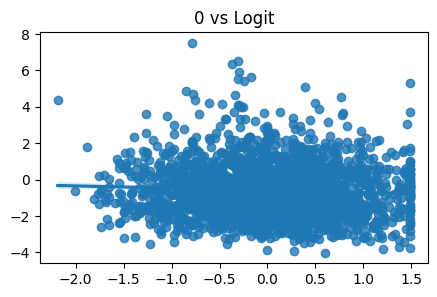

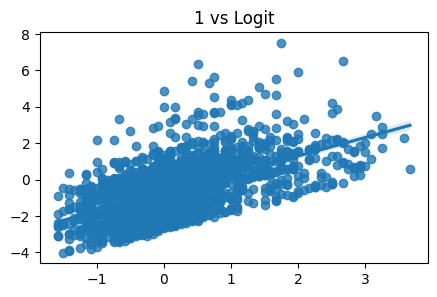

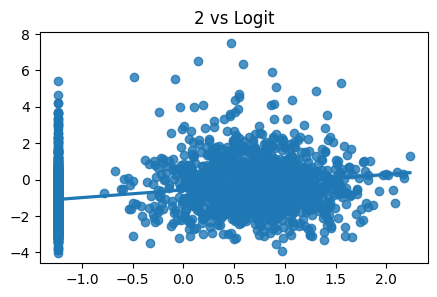

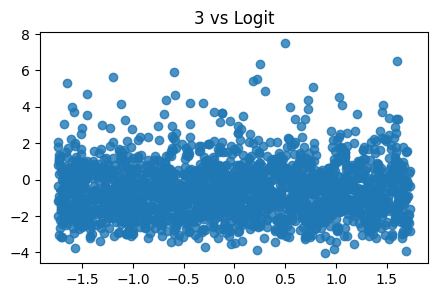

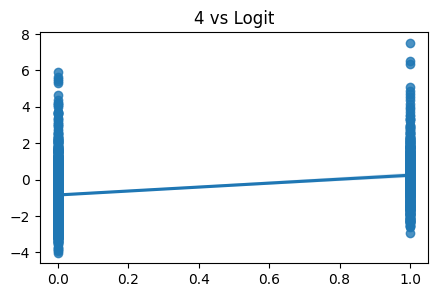

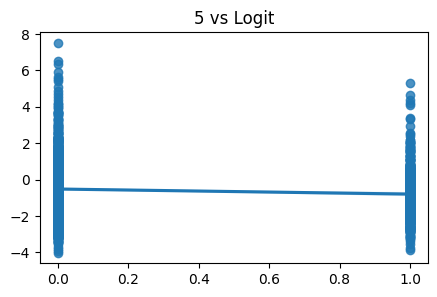

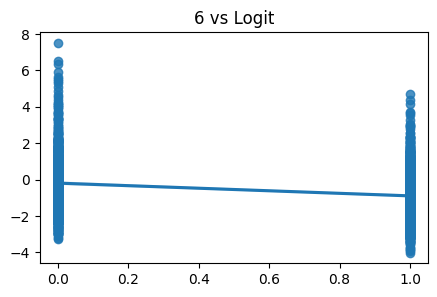

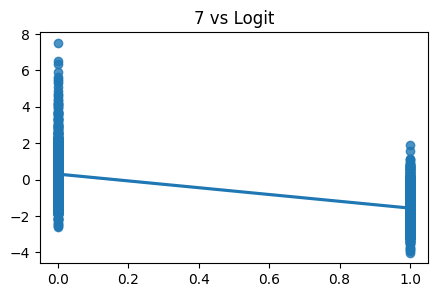

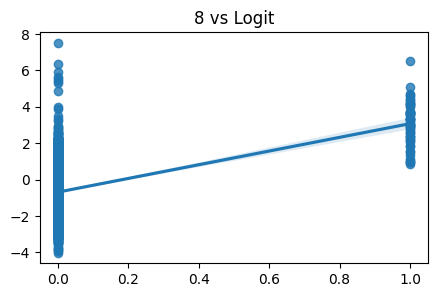

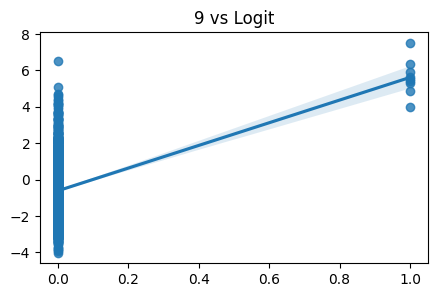

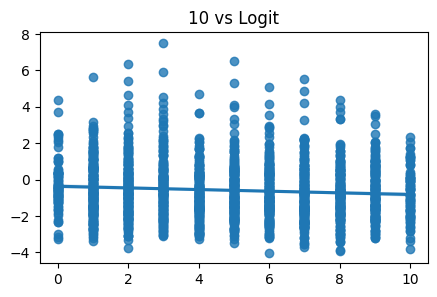

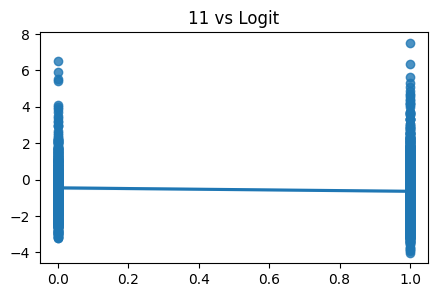

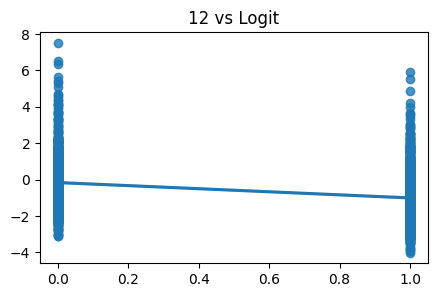

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

logit = np.log(lor.predict_proba(x_test_trf)[:,1] / (1 - lor.predict_proba(x_test_trf)[:,1]))

for i,col in enumerate(x1.columns):
    plt.figure(figsize=(5,3))
    sns.regplot(x=x_test_trf[:,col], y=logit, lowess=False)
    plt.title(f"{col} vs Logit")
    plt.show()

Let's try to improve earlier model using some ensemble techniques with the same logistic regression model.

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
bal_bag=BalancedBaggingClassifier(LogisticRegression(class_weight="balanced"),n_estimators=100,max_samples=0.75)
bal_bag.fit(x_train_trf,y_train)
print(classification_report(y_test,bal_bag.predict(x_test_trf)))
np.mean(cross_val_score(bal_bag,x_train_trf,y_train,cv=10,scoring="recall",n_jobs=-1))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1617
           1       0.44      0.75      0.55       383

    accuracy                           0.77      2000
   macro avg       0.68      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000



np.float64(0.7509236947791165)

Got a little improvement in Recall value using Bagging Classifier.